In [1]:
import talib
import pandas as pd
import matplotlib.pyplot as plt
import tushare as ts
import os

In [17]:
TUSHARE_API_KEY = os.environ.get('TUSHARE_API_KEY')

# 获取股票数据
ts_pro = ts.pro_api(TUSHARE_API_KEY)
df = ts_pro.daily(ts_code='600025.SH', start_date='20240514', end_date='20250513', fields='ts_code,trade_date,open,high,low,close,vol')
df['trade_date'] = pd.to_datetime(df['trade_date'])
df = df.reindex(index=df.index[::-1])
df.to_csv('data/600025.SH.csv', index=False)

In [18]:
# 读取
df = pd.read_csv('data/600025.SH.csv')
df

,ts_code,trade_date,open,high,low,close,vol
0,600025.SH,2024-05-14,9.54,9.63,9.40,9.57,380170.63
1,600025.SH,2024-05-15,9.57,9.64,9.46,9.47,219619.39
2,600025.SH,2024-05-16,9.49,9.50,9.32,9.35,389845.43
3,600025.SH,2024-05-17,9.35,9.42,9.31,9.37,330476.57
4,600025.SH,2024-05-20,9.36,9.51,9.34,9.49,346174.62
...,...,...,...,...,...,...,...
237,600025.SH,2025-05-07,9.52,9.60,9.45,9.58,317314.08
238,600025.SH,2025-05-08,9.54,9.65,9.54,9.62,263474.79
239,600025.SH,2025-05-09,9.65,9.88,9.63,9.80,440692.21
240,600025.SH,2025-05-12,9.75,9.79,9.72,9.74,272247.72


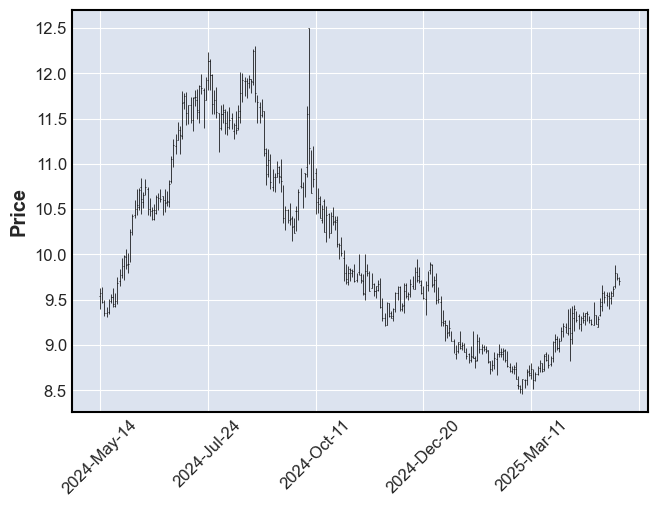

In [19]:
import mplfinance as mpf

df['trade_date'] = pd.to_datetime(df['trade_date'])
df.set_index('trade_date', inplace=True)

df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'vol': 'Volume'}, inplace=True)

mpf.plot(df)

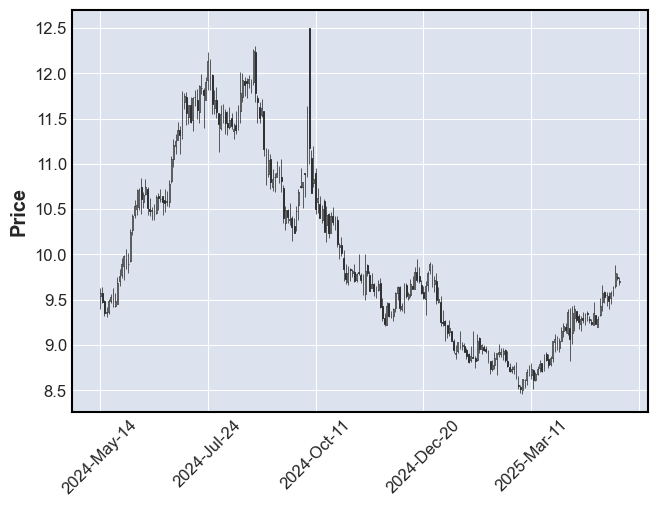

In [20]:
mpf.plot(df, type='candle')

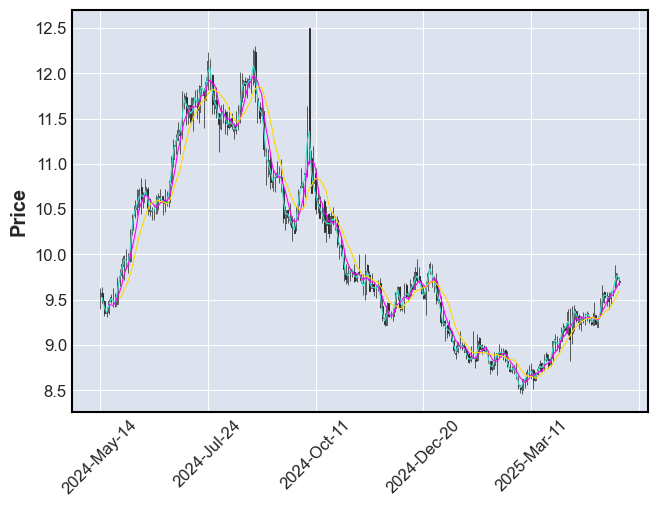

In [21]:
mpf.plot(df, type='candle', mav=(2, 5, 10))

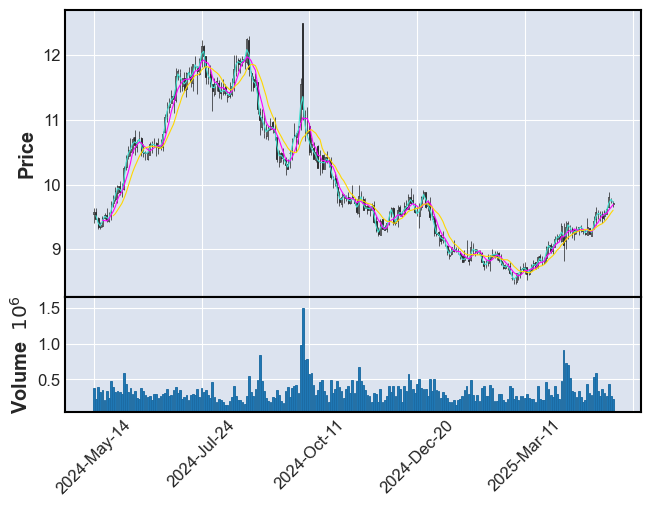

In [22]:
mpf.plot(df, type='candle', mav=(2, 5, 10), volume=True)

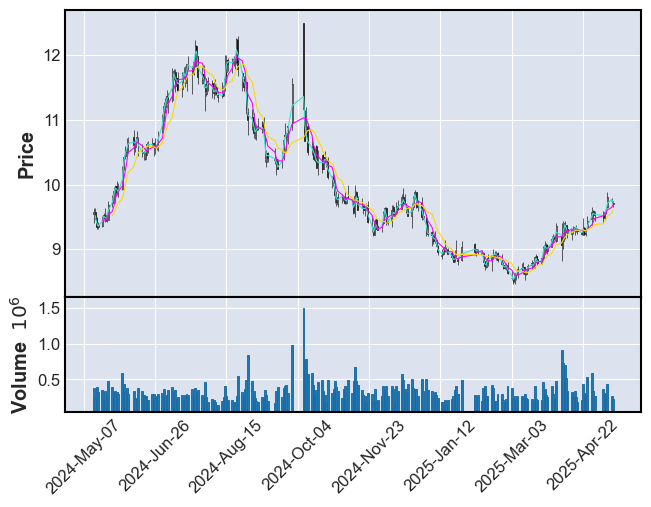

In [23]:
mpf.plot(df, type='candle', mav=(2, 5, 10), volume=True, show_nontrading=True)

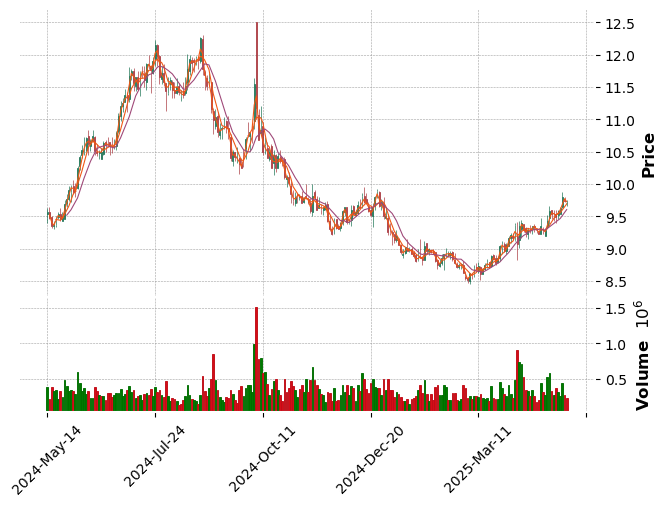

In [24]:
mpf.plot(df, type='candle', style='charles', mav=(2, 5, 10), volume=True)

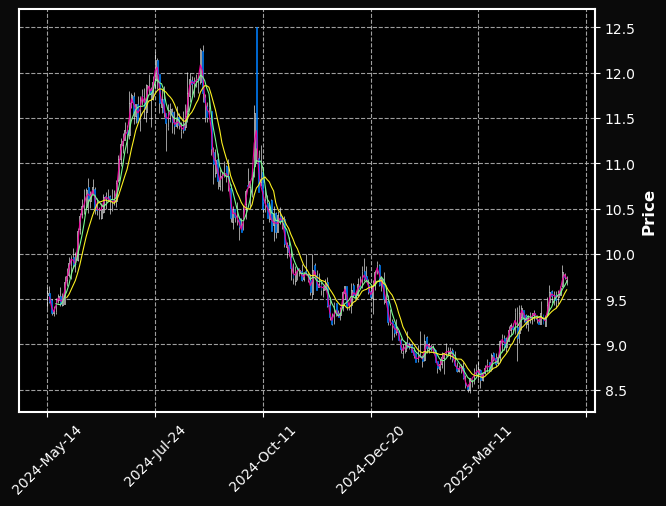

In [25]:
mpf.plot(df, type='candle', style='mike', mav=(2, 5, 10))

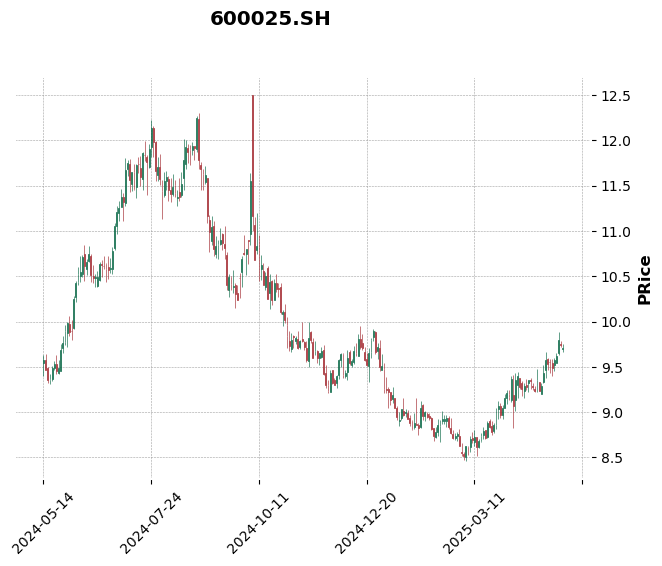

In [ ]:
mpf.plot(df, type='candle', style='charles', datetime_format='%Y-%m-%d', title='600025.SH')

/Users/gaussic/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25253 (\N{CJK UNIFIED IDEOGRAPH-62A5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gaussic/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


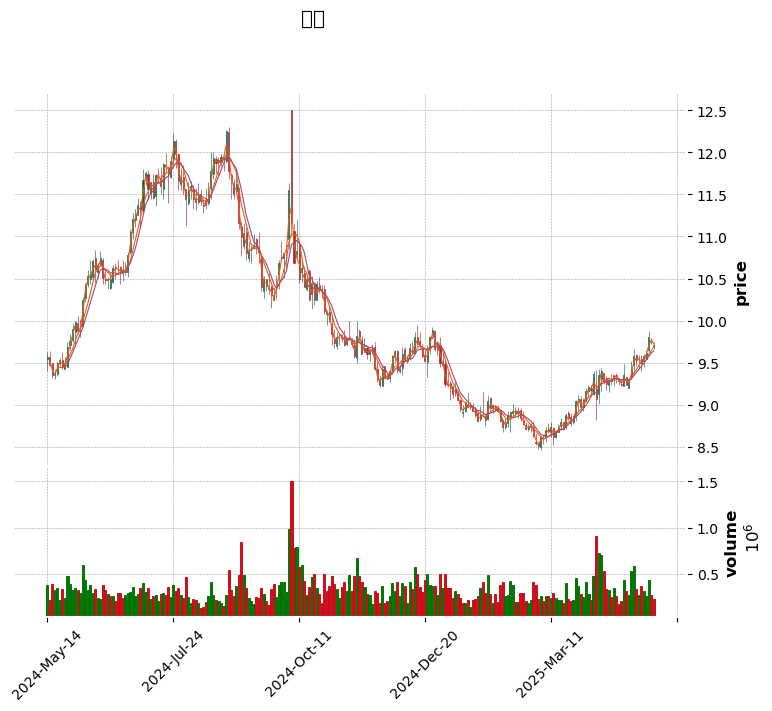

In [29]:
kwargs = dict(type='candle', mav=(2,5,7), volume=True, title='报价', ylabel='price', ylabel_lower='volume', figratio=(10,8), figscale=1.3, linecolor='g')
mpf.plot(df, **kwargs, style='charles')